In [ ]:
!pip install tensorflow==2.9

In [ ]:
!unzip "/content/drive/MyDrive/Phase II Project Work.zip"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D,GaussianNoise,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=3072)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
# import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
test_set="/content/Phase II Project Work/Cancer_Data_Set/Brain Tumour/Testing"
train_set="/content/Phase II Project Work/Cancer_Data_Set/Brain Tumour/Training"

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
train_generator

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
es= EarlyStopping(monitor="accuracy",min_delta=0.01,patience=8,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor="accuracy",filepath="/content/drive/MyDrive/Phase II Project Work/BrainTumour/brainmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [10]:
import tensorflow as tf
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)
# base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', input_shape=(224,224,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.summary()

31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1408)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                           

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall'])

In [12]:
hs=model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=test_generator,
    callbacks=cd
    )

Epoch 1/20
714/714 [==============================] - ETA: 0s - loss: 0.6761 - accuracy: 0.7768 - precision: 0.7970 - recall: 0.7535
Epoch 1: accuracy improved from -inf to 0.77679, saving model to /content/drive/MyDrive/Phase II Project Work/BrainTumour/brainmodel.h5
714/714 [==============================] - 188s 226ms/step - loss: 0.6761 - accuracy: 0.7768 - precision: 0.7970 - recall: 0.7535 - val_loss: 1.0801 - val_accuracy: 0.4958 - val_precision: 0.6683 - val_recall: 0.4272
Epoch 2/20
714/714 [==============================] - ETA: 0s - loss: 0.4061 - accuracy: 0.8596 - precision: 0.8728 - recall: 0.8479
Epoch 2: accuracy improved from 0.77679 to 0.85959, saving model to /content/drive/MyDrive/Phase II Project Work/BrainTumour/brainmodel.h5
714/714 [==============================] - 175s 244ms/step - loss: 0.4061 - accuracy: 0.8596 - precision: 0.8728 - recall: 0.8479 - val_loss: 0.3431 - val_accuracy: 0.8978 - val_precision: 0.9016 - val_recall: 0.8947
Epoch 3/20
714/714 [=====

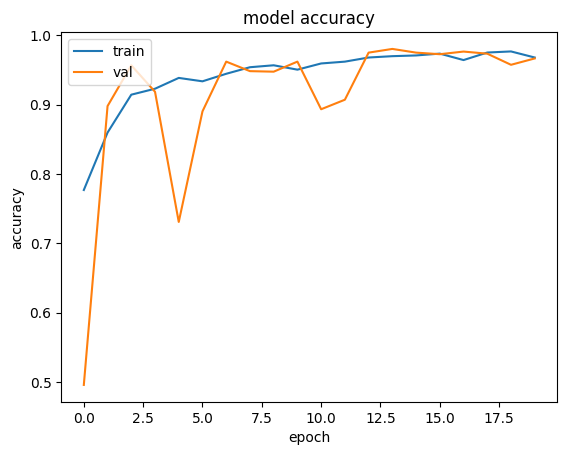

In [13]:
from matplotlib import pyplot as plt
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [3]:
from tensorflow import keras
model = keras.models.load_model('D:\Phase II Project Work\BrainTumour\\brainmodel.h5')

1/1 [==============================] - 0s 46ms/step
The suspected result is Glioma


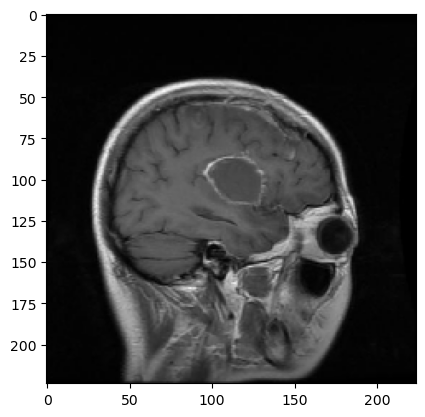

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
pathss="D:\\Phase II Project Work\\Cancer_Data_Set\\Brain Tumour\\Testing\\glioma\\Te-gl_0278.jpg"
img = image.load_img(pathss,target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
a=int(np.argmax(ypred,-1))

if(a==0):
    op="Glioma"
elif  a==1:
    op="meningioma"
elif a==2:
    op="no tumor"
else:
    op="pituitary"
plt.imshow(img)
print("The suspected result is "+str(op))  

In [18]:

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
pathss="D:\\Phase II Project Work\\Cancer_Data_Set\\Brain Tumour\\Testing\\glioma\\"
dir_list = os.listdir(pathss)
p=0
c=0
for f in dir_list:
    img = image.load_img(pathss+f,target_size=(224,224))
    imag = image.img_to_array(img)

    imaga = np.expand_dims(imag,axis=0) 
    ypred = model.predict(imaga)
    a=int(np.argmax(ypred,-1))
    c+=1
    if(a==0):
        p+=1

print(p/c)

1/1 [==============================] - 0s 44ms/step
0.9466666666666667
